# Project: Learning to Label – From Clustering to Classification
In the real world, data rarely comes with clean labels. As a machine learning engineer at a data-centric company, you’re handed fairly large, unlabelled datasets across two domains—images and text. Your team is tasked with building a functional classification system, but without labeled training data, the first challenge is to create your own labels. Welcome to your mission: learning to label intelligently and building robust classifiers from scratch.

This project simulates the workflow of a modern unsupervised-to-supervised machine learning pipeline. It is structured in two stages, each of which builds upon the other:

# Image Dataset

In [2]:
import numpy as np

original_images_df = np.load('unlabelled_train_data_images.npy',allow_pickle=True)
original_images_df.shape

(60000, 1, 28, 28)

In [3]:
original_images_df

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       ...,


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]

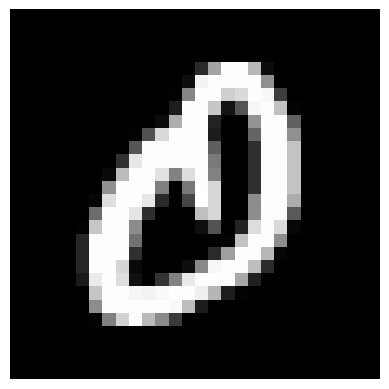

In [4]:
import matplotlib.pyplot as plt
def view_img(df, idx):
    img = df[idx]
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    # plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

view_img(original_images_df, 2)

# Text Dataset

In [3]:
import pickle
import pandas as pd

original_text_df = pickle.load(open('train_data_text.pkl', 'rb'))

In [4]:
text_df= original_text_df.copy()
text_df= pd.DataFrame(original_text_df.copy(), columns=['text'])
#text_df['text']= text_df['text'].str.lower()
#text_df['text']= text_df['text'].str.replace(r'[^a-zA-Z0-9\s]','',regex=True)

In [5]:
import nltk
nltk.download('stopwords')
import re

def process_text(text):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    lemmatizer= WordNetLemmatizer()
    stop_words= set(stopwords.words('english'))
    text= text.lower()
    processed_text= re.sub(r'[^a-zA-Z0-9\s]','',text)

    token= [ lemmatizer.lemmatize(word) for word in processed_text.split() if word not in stop_words]
    return ' '.join(token)

text_df['processed_text']= text_df['text'].apply(process_text)

[nltk_data] Downloading package stopwords to /home/ruksad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
text_df 

,text,processed_text
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,article 93089204431grv101psuvmpsuedu callec dr...
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...
...,...,...
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...
1496,\nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...,c5tvl21inhermeshrzunibielefeldde hoovermathema...
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...
1498,"\n3500 miles, black leather tank bra, tank bag...",3500 mile black leather tank bra tank bag corb...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


def count_vectorize(df):
    vectorizer= CountVectorizer()
    vectors= vectorizer.fit_transform(df['processed_text']).toarray()
    df['count_vector']= list(vectors)
    return vectors, vectorizer.vocabulary_

def tfidf_vectorizer(df):
    tfidf_vectorizer = TfidfVectorizer(max_features=1000)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
    df['tfidf_vector'] = list(tfidf_vectors)
    return tfidf_vectors

def word2Vec_vectorizer(df):
    from gensim.models import Word2Vec

    model= Word2Vec(sentences= df['processed_text'].apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)
    def vectorize(text):
        words = text.split()
        return np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)
    
    df['word2vec'] = df['processed_text'].apply(vectorize)
    return np.array(df['word2vec'].tolist())


In [11]:
# Generate vectorizations 
count_vectors, count_vectorizer_vocab = count_vectorize(text_df)
tfidf_vectors = tfidf_vectorizer(text_df)
word2vec_vectors = word2Vec_vectorizer(text_df)

text_df 


,text,processed_text,count_vector,tfidf_vector,word2vec
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,article 93089204431grv101psuvmpsuedu callec dr...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13272771583061566, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-0.26770929, 0.39663067, 0.19073294, 0.071076..."
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,article 1993apr191311027843rchlandibmcom xzz02...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.32367423, 0.47482753, 0.22286835, 0.086688..."
2,\nYou can get a *little* UV by putting a heavy...,get little uv putting heavy uv filter deep pur...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.23321368, 0.33179507, 0.17432955, 0.053127..."
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntppostinghost accessdigexnet trouble trying ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.22381249, 0.34939742, 0.15871324, 0.057400..."
4,\n\n\nI understand that the new GPS boxes now ...,understand new gps box option known differenti...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.21258776, 0.3409376, 0.16472432, 0.0497933..."
...,...,...,...,...,...
1495,Nntp-Posting-Host: wcsub.ctstateu.edu\nOrganiz...,nntppostinghost wcsubctstateuedu organization ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.10147120584977741, 0.1174319...","[-0.23417448, 0.37452433, 0.16234897, 0.065623..."
1496,\nIn <C5tvL2.1In@hermes.hrz.uni-bielefeld.de> ...,c5tvl21inhermeshrzunibielefeldde hoovermathema...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3291929, 0.46966064, 0.24133189, 0.0785047..."
1497,"\nIn article <79895@cup.portal.com>, Thyagi@cu...",article 79895cupportalcom thyagicupportalcom t...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.24506845, 0.38869599, 0.17267627, 0.068135..."
1498,"\n3500 miles, black leather tank bra, tank bag...",3500 mile black leather tank bra tank bag corb...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.21527514, 0.32473454, 0.15972382, 0.052382..."


In [ ]:

# # Save the vectorized data
# np.save('count_vectors.npy', count_vectors)
# np.save('tfidf_vectors.npy', tfidf_vectors)
# np.save('word2vec_vectors.npy', word2vec_vectors)
# # Save the vectorizer   
#with open('count_vectorizer.pkl', 'wb') as f:
#    pickle.dump(count_vectorizer_vocab, f)
# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(tfidf_vectorizer, f)    
# # Save the processed text data
# text_df.to_csv('processed_text.csv', index=False)
# # Save the original text data
# original_text_df.to_csv('original_text.csv', index=False)

In [12]:
# Apply KMeans clustering to count_vector, tfidf_vector, and word2vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# KMeans for count_vector
kmeans_count = KMeans(n_clusters=5, random_state=42)
text_df['count_vector_cluster'] = kmeans_count.fit_predict(np.array(text_df['count_vector'].tolist()))
kmeans_count_lables= kmeans_count.labels_

# KMeans for tfidf_vector
kmeans_tfidf = KMeans(n_clusters=5, random_state=42)
text_df['tfidf_vector_cluster'] = kmeans_tfidf.fit_predict(np.array(text_df['tfidf_vector'].tolist()))
kmeans_tfidf_lables= kmeans_tfidf.labels_

# KMeans for word2vec
kmeans_word2vec = KMeans(n_clusters=5, random_state=42)
text_df['word2vec_cluster'] = kmeans_word2vec.fit_predict(np.array(text_df['word2vec'].tolist()))
kmeans_word2vec_lables= kmeans_word2vec.labels_

summary_metrics= pd.DataFrame({
    "Vector Method": ["count-vector", "tf-idf-vector", "word2vec"],
    "Inertia": [
        kmeans_count.inertia_,
        kmeans_tfidf.inertia_,
        kmeans_word2vec.inertia_
    ],
    "Silhouette Score": [
        silhouette_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        silhouette_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        silhouette_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
        ],
    "Calinski-Harabasz Index": [
        calinski_harabasz_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        calinski_harabasz_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        calinski_harabasz_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ],
    "Davies-Bouldin Index": [
        davies_bouldin_score(kmeans_count.transform(np.array(text_df['count_vector'].tolist())), kmeans_count.labels_),
        davies_bouldin_score(kmeans_tfidf.transform(np.array(text_df['tfidf_vector'].tolist())), kmeans_tfidf.labels_),
        davies_bouldin_score(kmeans_word2vec.transform(np.array(text_df['word2vec'].tolist())), kmeans_word2vec.labels_)
    ]
})

summary_metrics

,Vector Method,Inertia,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
0,count-vector,517240.963710,0.882211,579.737830,1.234039
1,tf-idf-vector,1386.797543,0.197187,144.834122,1.430685
2,word2vec,87.332764,0.488507,1818.983882,0.655120


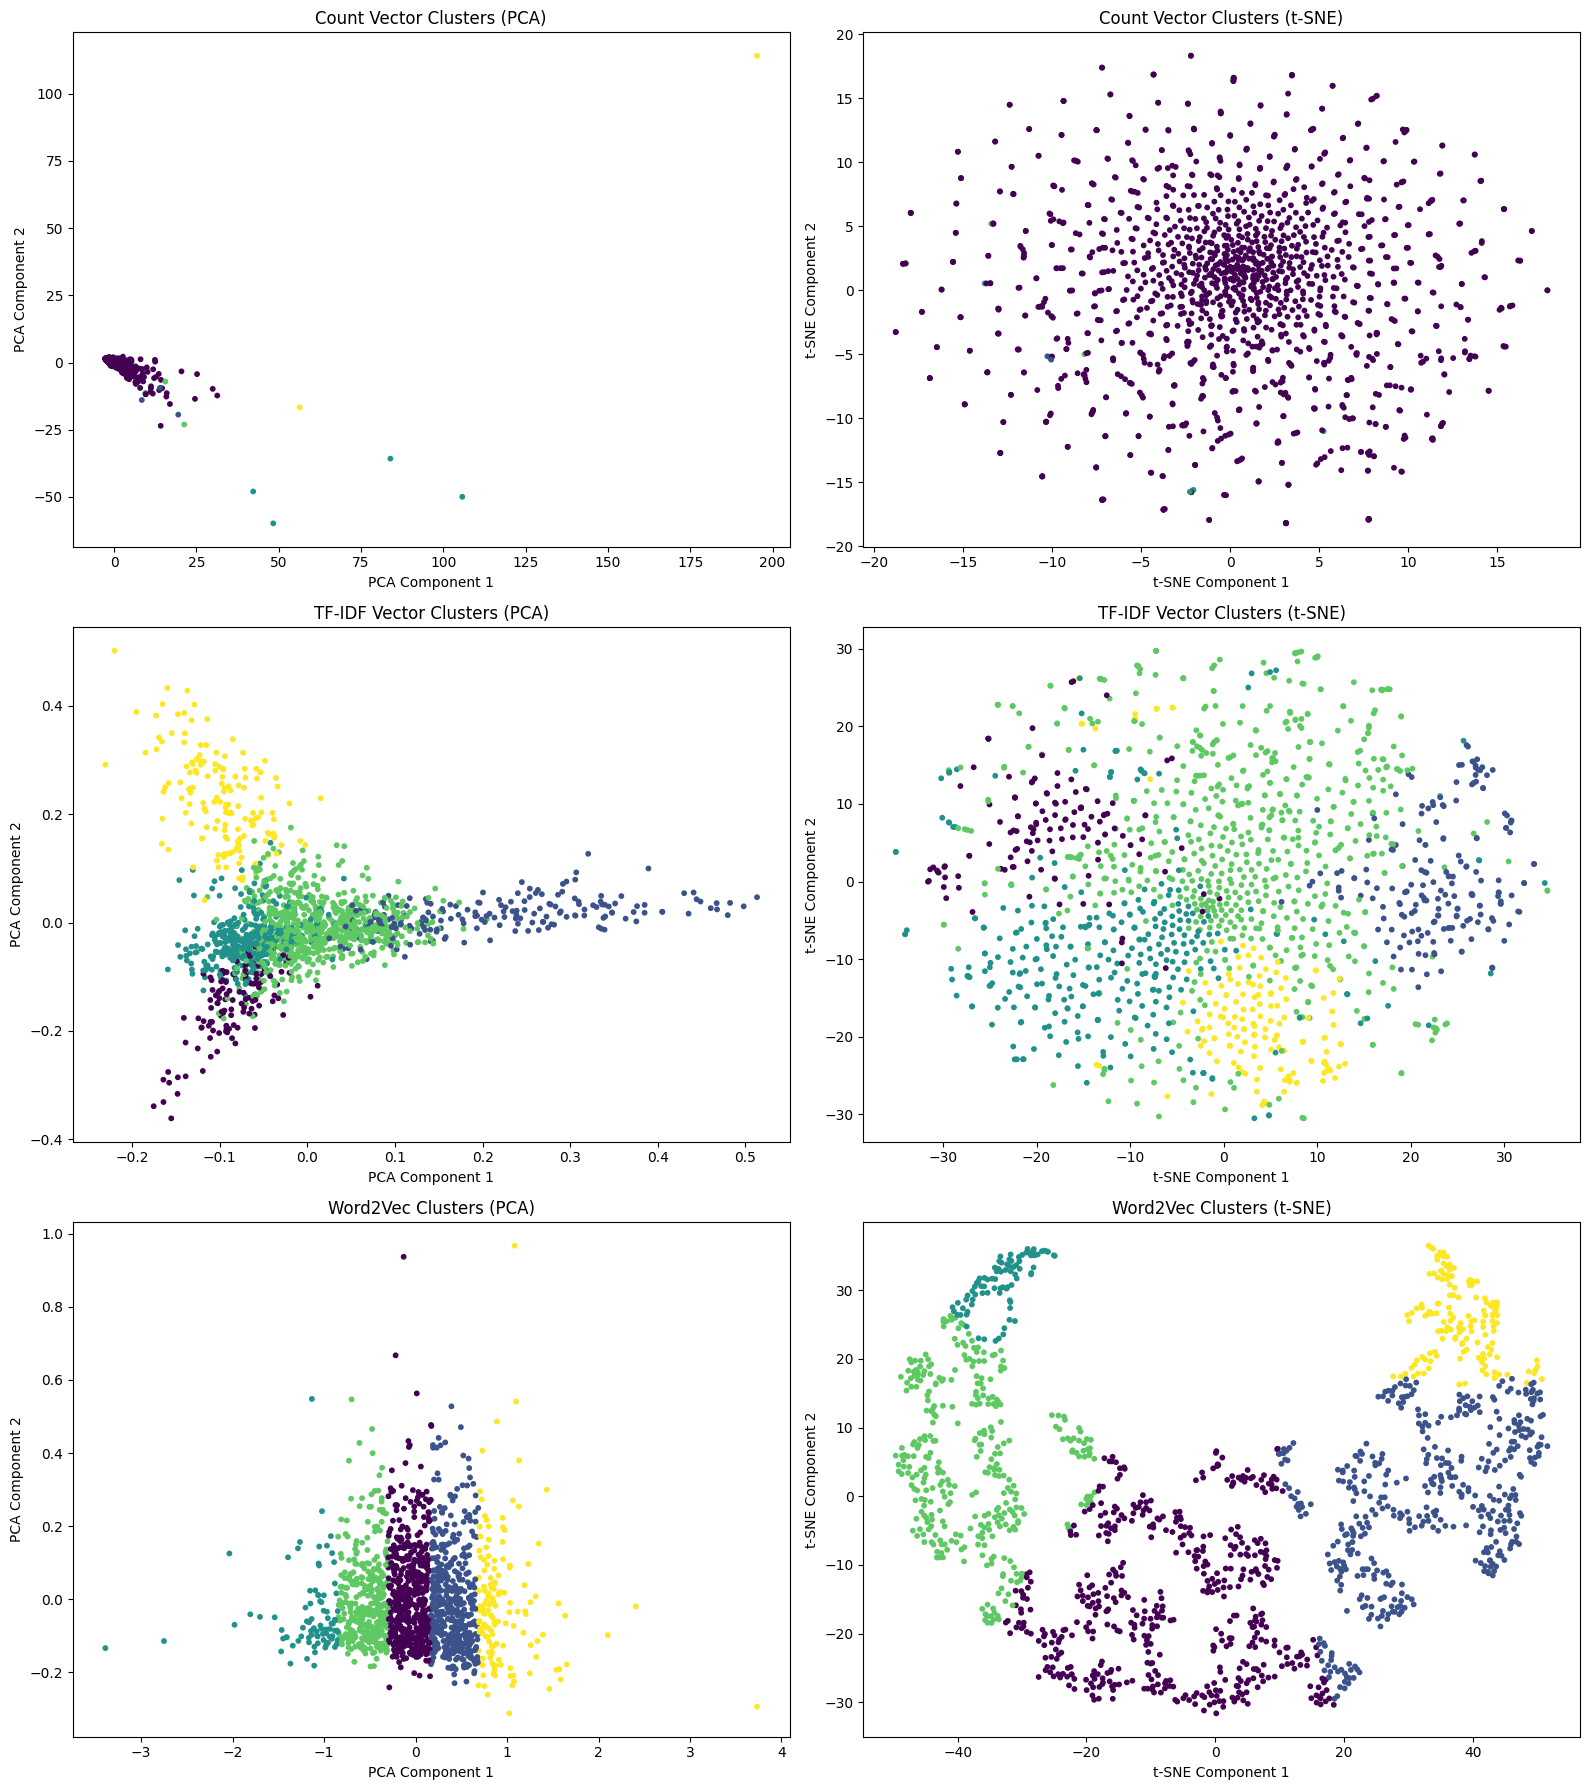

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for all vector types
vector_data = {
    "Count Vector": np.array(text_df['count_vector'].tolist()),
    "TF-IDF Vector": np.array(text_df['tfidf_vector'].tolist()),
    "Word2Vec": np.array(text_df['word2vec'].tolist())
}

vector_labels = {
    "Count Vector": text_df['count_vector_cluster'],
    "TF-IDF Vector": text_df['tfidf_vector_cluster'],
    "Word2Vec": text_df['word2vec_cluster']
}

# Create subplots for PCA and t-SNE visualizations
fig, axes = plt.subplots(len(vector_data), 2, figsize=(16, 18))

for i, (vector_name, data) in enumerate(vector_data.items()):
    labels = vector_labels[vector_name]

    # Apply PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    data_tsne = tsne.fit_transform(data)

    # PCA Visualization
    axes[i, 0].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10)
    axes[i, 0].set_title(f"{vector_name} Clusters (PCA)")
    axes[i, 0].set_xlabel("PCA Component 1")
    axes[i, 0].set_ylabel("PCA Component 2")

    # t-SNE Visualization
    axes[i, 1].scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=10)
    axes[i, 1].set_title(f"{vector_name} Clusters (t-SNE)")
    axes[i, 1].set_xlabel("t-SNE Component 1")
    axes[i, 1].set_ylabel("t-SNE Component 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize clusters after dimensionality reduction
def visualize_reduction(data, labels, title, method="PCA"):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f"{title} ({method})")
    plt.xlabel(f"{method} Component 1")
    plt.ylabel(f"{method} Component 2")
    plt.show()

# Dimensionality reduction using PCA
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Dimensionality reduction using t-SNE
def apply_tsne(data, n_components=2, random_state=42):
    tsne = TSNE(n_components=n_components, random_state=random_state)
    return tsne.fit_transform(data)

""" # Apply PCA and t-SNE for Count Vector
count_vector_data = np.array(text_df['count_vector'].tolist())
count_vector_pca = apply_pca(count_vector_data)
count_vector_tsne = apply_tsne(count_vector_data)

# Visualize Count Vector clusters
visualize_reduction(count_vector_pca, text_df['count_vector_cluster'], "Count Vector Clusters", method="PCA")
visualize_reduction(count_vector_tsne, text_df['count_vector_cluster'], "Count Vector Clusters", method="t-SNE")

# Apply PCA and t-SNE for TF-IDF Vector
tfidf_vector_data = np.array(text_df['tfidf_vector'].tolist())
tfidf_vector_pca = apply_pca(tfidf_vector_data)
tfidf_vector_tsne = apply_tsne(tfidf_vector_data)

# Visualize TF-IDF Vector clusters
visualize_reduction(tfidf_vector_pca, text_df['tfidf_vector_cluster'], "TF-IDF Clusters", method="PCA")
visualize_reduction(tfidf_vector_tsne, text_df['tfidf_vector_cluster'], "TF-IDF Clusters", method="t-SNE")
 """
# Apply PCA and t-SNE for Word2Vec
word2vec_data = np.array(text_df['word2vec'].tolist())
word2vec_pca = apply_pca(word2vec_data)
word2vec_tsne = apply_tsne(word2vec_data)

# Visualize Word2Vec clusters
visualize_reduction(word2vec_pca, text_df['word2vec_cluster'], "Word2Vec Clusters", method="PCA")
visualize_reduction(word2vec_tsne, text_df['word2vec_cluster'], "Word2Vec Clusters", method="t-SNE")

# Generating Labels for Text Dataset
We will create embeddings for the text data, apply a clustering algorithm, and assign labels to the dataset.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Generate TF-IDF embeddings for the text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_embeddings = vectorizer.fit_transform(original_text_df).toarray()
X_train_embeddings.shape

(1500, 1000)

In [ ]:
# Apply KMeans clustering to create clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
Y_train = kmeans.fit_predict(X_train_embeddings)
np.unique(Y_train, return_counts=True)

# Assigning Labels
The clusters generated by KMeans are used as labels for the dataset. The labels are stored in `Y_train`.

In [ ]:
# Display a sample of the generated labels
for i in range(5):
    print(f'Text: {original_text_df[i][:100]}... | Label: {Y_train[i]}')

